<a href="https://colab.research.google.com/github/AbdullahAlshamrani0/IDS/blob/main/H.W6/Project_6_Problem_2_(R).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abdullah Alshamrani / Project 6 - Problem 2 (R)

In this problem, you will work with the loans_training and loans_test datasets found here: https://github.com/bforoura/IDS/tree/main/HW6Links to an external site.

Create a CART model using the training data set that predicts Approval using Debt-to-Income Ratio, FICO Score, etc. Visualize the decision tree and Describe the first few splits in the decision tree.

Build a C5.0 model using the same predictors and target as in part 1.  This time, specify a minimum of 1000 cases per terminal node. Visualize the decision tree. Describe the first few splits in the decision tree.

How does your C5.0 model compare to your CART model for the loans_training data? Describe the similarities and differences.




In [7]:
# Install necessary libraries
install.packages('rpart')
install.packages('C50')

# Load libraries
library(rpart)
library(C50)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:

# Load the training dataset
url_train <- "https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Training.csv"
df_train <- read.csv(url_train)

# Print column names to identify correct predictor names
colnames(df_train)

# Define predictors and target variable
predictors <- c('Debt.to.Income.Ratio', 'FICO.Score', 'Request.Amount', 'Interest')  # Update with correct column names
target <- 'Approval'

[1] "Approval"             "Debt.to.Income.Ratio" "FICO.Score"          
[4] "Request.Amount"       "Interest"

Call:
rpart(formula = Approval ~ ., data = df_train, method = "class")
  n= 150302 

         CP nsplit rel error    xerror        xstd
1 0.5646498      0 1.0000000 1.0026510 0.002582311
2 0.1267551      1 0.4353502 0.4353502 0.002130393
3 0.0100000      2 0.3085951 0.3094077 0.001866781

Variable importance
          FICO.Score Debt.to.Income.Ratio 
                  74                   25 

Node number 1: 150302 observations,    complexity param=0.5646498
  predicted class=TRUE   expected loss=0.4994345  P(node) =1
    class counts: 75066 75236
   probabilities: 0.499 0.501 
  left son=2 (46002 obs) right son=3 (104300 obs)
  Primary splits:
      FICO.Score           < 659.5 to the left,  improve=28208.770, (0 missing)
      Debt.to.Income.Ratio < 0.305 to the right, improve= 8986.886, (0 missing)
      Request.Amount       < 25500 to the right, improve= 1191.854, (0 missing)
      Interest             < 11475 to the right, improve= 1191.854, (0 missing)
  Surrogate splits:
      R

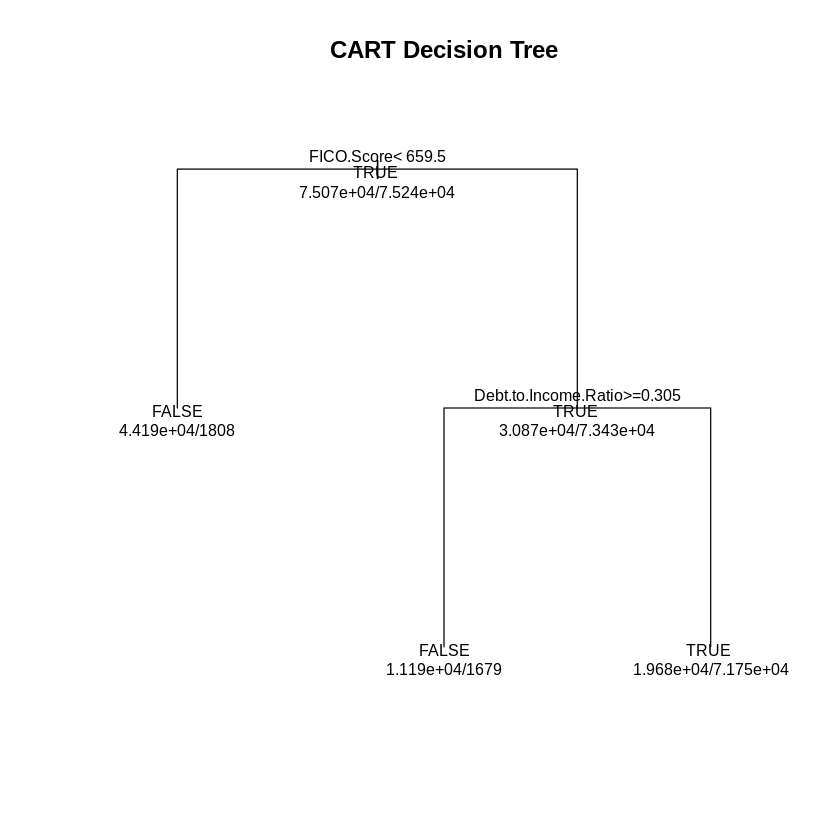

In [9]:

# Create training and test datasets
X_train <- df_train[predictors]
y_train <- df_train[[target]]

# CART model
cart_model <- rpart(Approval ~ ., data = df_train, method = "class")

# Visualize the decision tree
plot(cart_model, main="CART Decision Tree", uniform=TRUE, margin=0.1)
text(cart_model, use.n=TRUE, all=TRUE, cex=0.8)

# Describe the first few splits in the decision tree
summary(cart_model)



Call:
C5.0.default(x = as.data.frame(X_train), y = y_train, trials = 10)


C5.0 [Release 2.07 GPL Edition]  	Thu Dec 14 21:14:29 2023
-------------------------------

Class specified by attribute `outcome'

Read 150302 cases (5 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

FICO.Score <= 656: FALSE (43749/1090)
FICO.Score > 656:
:...Debt.to.Income.Ratio > 0.31: FALSE (12077/1147)
    Debt.to.Income.Ratio <= 0.31:
    :...Debt.to.Income.Ratio > 0.25:
        :...Request.Amount > 25000: FALSE (1629/488)
        :   Request.Amount <= 25000:
        :   :...FICO.Score > 672:
        :       :...Request.Amount <= 19000: TRUE (5523/1925)
        :       :   Request.Amount > 19000:
        :       :   :...Debt.to.Income.Ratio <= 0.3: TRUE (1084/466)
        :       :       Debt.to.Income.Ratio > 0.3: FALSE (172/65)
        :       FICO.Score <= 672:
        :       :...Request.Amount > 22000: FALSE (93/22)
        :           Request.Amount <= 22000:
        :      

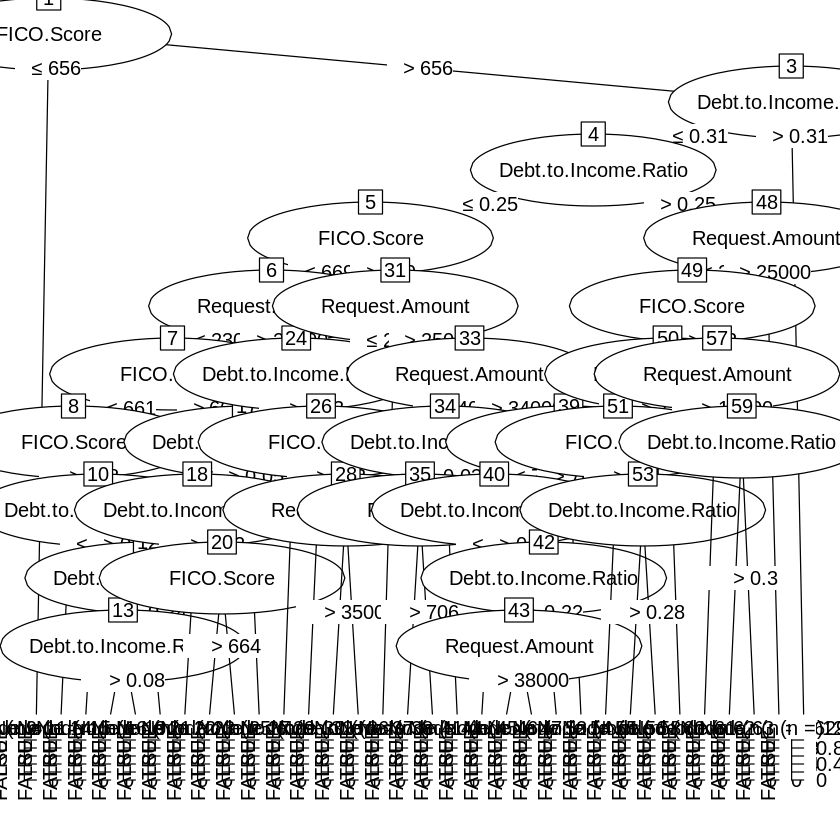

In [22]:
# Convert 'Approval' to factor explicitly
y_train <- as.factor(y_train)

# C5.0 model
c50_model <- C5.0(as.data.frame(X_train), y_train, trials=10)

# Visualize the decision tree
plot(c50_model)

# Describe the first few splits in the decision tree
summary(c50_model)



In [23]:

# Load the test dataset
url_test <- "https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Test.csv"
df_test <- read.csv(url_test)

# Convert 'Approval' to factor in the test set
df_test$Approval <- as.factor(df_test$Approval)

# Create test dataset
X_test <- df_test[predictors]
y_test <- df_test[[target]]

# Compare models
y_pred_cart <- predict(cart_model, newdata = df_test, type = "class")
accuracy_cart <- sum(y_pred_cart == df_test$Approval) / nrow(df_test)
cat("Accuracy of CART model:", accuracy_cart, "\n")

y_pred_c50 <- predict(c50_model, newdata = as.data.frame(X_test))
accuracy_c50 <- sum(y_pred_c50 == y_test) / length(y_test)
cat("Accuracy of C5.0 model:", accuracy_c50, "\n")

Accuracy of CART model: 0.8432331 
Accuracy of C5.0 model: 0.8479617 
